In [30]:
import numpy as np
import matplotlib.pyplot as plt

In [17]:
data_filepath = "data/dsprites_ndarray_co1sh3sc6or40x32y32_64x64.npz"

data = np.load(data_filepath)

In [19]:
imgs = data["imgs"]
latents_values = data["latents_values"]
latents_classes = data["latents_classes"]
metadata = {'description': 'Disentanglement test Sprites dataset.Procedurally generated 2D shapes, from 6 disentangled latent factors.This dataset uses 6 latents, controlling the color, shape, scale, rotation and position of a sprite. All possible variations of the latents are present. Ordering along dimension 1 is fixed and can be mapped back to the exact latent values that generated that image.We made sure that the pixel outputs are different. No noise added.', 'latents_sizes': np.array([ 1,  3,  6, 40, 32, 32]), 'latents_names': ('color', 'shape', 'scale', 'orientation', 'posX', 'posY'), 'date': 'April 2017', 'version': 1, 'title': 'dSprites dataset', 'latents_possible_values': {'posX': np.array([ 0.        ,  0.03225806,  0.06451613,  0.09677419,  0.12903226,
        0.16129032,  0.19354839,  0.22580645,  0.25806452,  0.29032258,
        0.32258065,  0.35483871,  0.38709677,  0.41935484,  0.4516129 ,
        0.48387097,  0.51612903,  0.5483871 ,  0.58064516,  0.61290323,
        0.64516129,  0.67741935,  0.70967742,  0.74193548,  0.77419355,
        0.80645161,  0.83870968,  0.87096774,  0.90322581,  0.93548387,
        0.96774194,  1.        ]), 'posY': np.array([ 0.        ,  0.03225806,  0.06451613,  0.09677419,  0.12903226,
        0.16129032,  0.19354839,  0.22580645,  0.25806452,  0.29032258,
        0.32258065,  0.35483871,  0.38709677,  0.41935484,  0.4516129 ,
        0.48387097,  0.51612903,  0.5483871 ,  0.58064516,  0.61290323,
        0.64516129,  0.67741935,  0.70967742,  0.74193548,  0.77419355,
        0.80645161,  0.83870968,  0.87096774,  0.90322581,  0.93548387,
        0.96774194,  1.        ]), 'scale': np.array([ 0.5,  0.6,  0.7,  0.8,  0.9,  1. ]), 'orientation': np.array([ 0.        ,  0.16110732,  0.32221463,  0.48332195,  0.64442926,
        0.80553658,  0.96664389,  1.12775121,  1.28885852,  1.44996584,
        1.61107316,  1.77218047,  1.93328779,  2.0943951 ,  2.25550242,
        2.41660973,  2.57771705,  2.73882436,  2.89993168,  3.061039  ,
        3.22214631,  3.38325363,  3.54436094,  3.70546826,  3.86657557,
        4.02768289,  4.1887902 ,  4.34989752,  4.51100484,  4.67211215,
        4.83321947,  4.99432678,  5.1554341 ,  5.31654141,  5.47764873,
        5.63875604,  5.79986336,  5.96097068,  6.12207799,  6.28318531]), 'shape': np.array([ 1.,  2.,  3.]), 'color': np.array([ 1.])}, 'author': 'lmatthey@google.com'}

metadata

{'description': 'Disentanglement test Sprites dataset.Procedurally generated 2D shapes, from 6 disentangled latent factors.This dataset uses 6 latents, controlling the color, shape, scale, rotation and position of a sprite. All possible variations of the latents are present. Ordering along dimension 1 is fixed and can be mapped back to the exact latent values that generated that image.We made sure that the pixel outputs are different. No noise added.',
 'latents_sizes': array([ 1,  3,  6, 40, 32, 32]),
 'latents_names': ('color', 'shape', 'scale', 'orientation', 'posX', 'posY'),
 'date': 'April 2017',
 'version': 1,
 'title': 'dSprites dataset',
 'latents_possible_values': {'posX': array([0.        , 0.03225806, 0.06451613, 0.09677419, 0.12903226,
         0.16129032, 0.19354839, 0.22580645, 0.25806452, 0.29032258,
         0.32258065, 0.35483871, 0.38709677, 0.41935484, 0.4516129 ,
         0.48387097, 0.51612903, 0.5483871 , 0.58064516, 0.61290323,
         0.64516129, 0.67741935, 0.

In [22]:
# Define number of values per latents and functions to convert to indices
latents_sizes = metadata['latents_sizes']
latents_bases = np.concatenate((latents_sizes[::-1].cumprod()[::-1][1:],
                                np.array([1,])))

def latent_to_index(latents):
  return np.dot(latents, latents_bases).astype(int)


def sample_latent(size=1):
  samples = np.zeros((size, latents_sizes.size))
  for lat_i, lat_size in enumerate(latents_sizes):
    samples[:, lat_i] = np.random.randint(lat_size, size=size)

  return samples

In [31]:
# Helper function to show images
def show_images_grid(imgs_, num_images=25):
  ncols = int(np.ceil(num_images**0.5))
  nrows = int(np.ceil(num_images / ncols))
  _, axes = plt.subplots(ncols, nrows, figsize=(nrows * 3, ncols * 3))
  axes = axes.flatten()

  for ax_i, ax in enumerate(axes):
    if ax_i < num_images:
      ax.imshow(imgs_[ax_i], cmap='Greys_r',  interpolation='nearest')
      ax.set_xticks([])
      ax.set_yticks([])
    else:
      ax.axis('off')

def show_density(imgs):
  _, ax = plt.subplots()
  ax.imshow(imgs.mean(axis=0), interpolation='nearest', cmap='Greys_r')
  ax.grid('off')
  ax.set_xticks([])
  ax.set_yticks([])

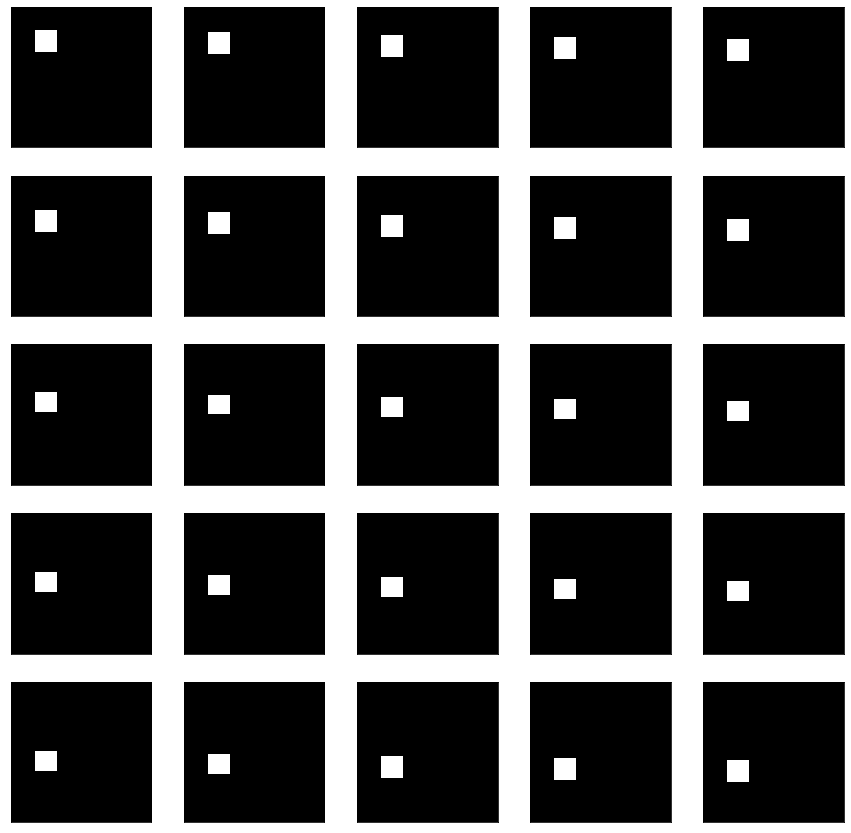

In [35]:
show_images_grid(imgs[:25], 25)

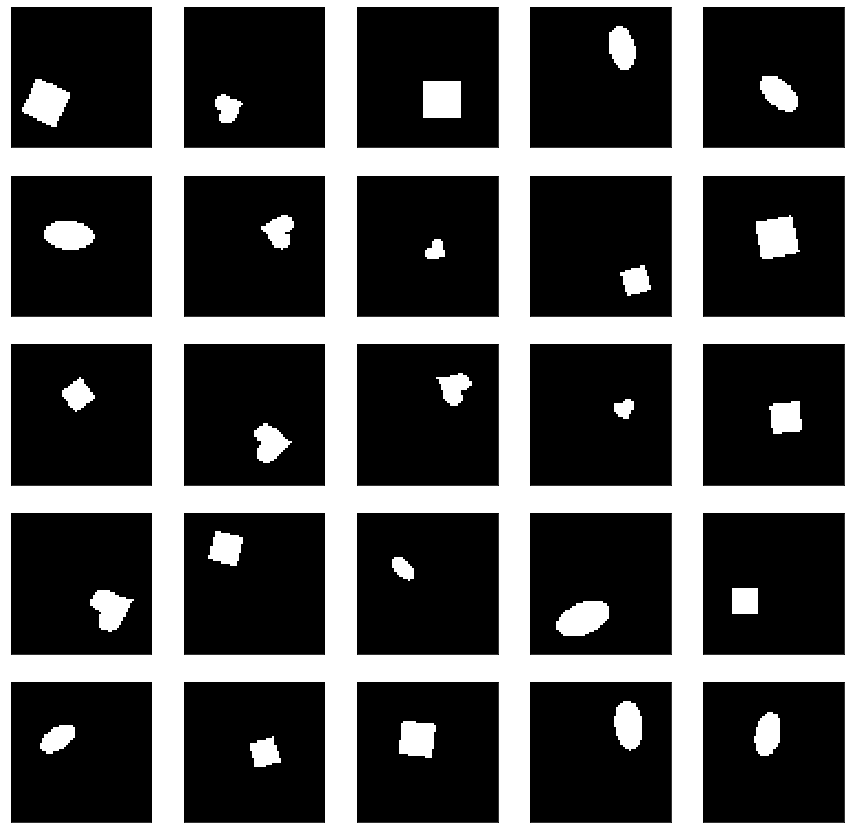

In [36]:
latent_sample = sample_latent(size=5000)

indices_of_samples = latent_to_index(latent_sample)
imgs_sampled = imgs[indices_of_samples]

show_images_grid(imgs_sampled)

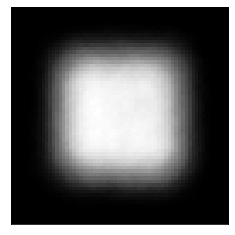

In [37]:
show_density(imgs_sampled)

In [38]:
latents_classes

array([[ 0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  2],
       ...,
       [ 0,  2,  5, 39, 31, 29],
       [ 0,  2,  5, 39, 31, 30],
       [ 0,  2,  5, 39, 31, 31]])

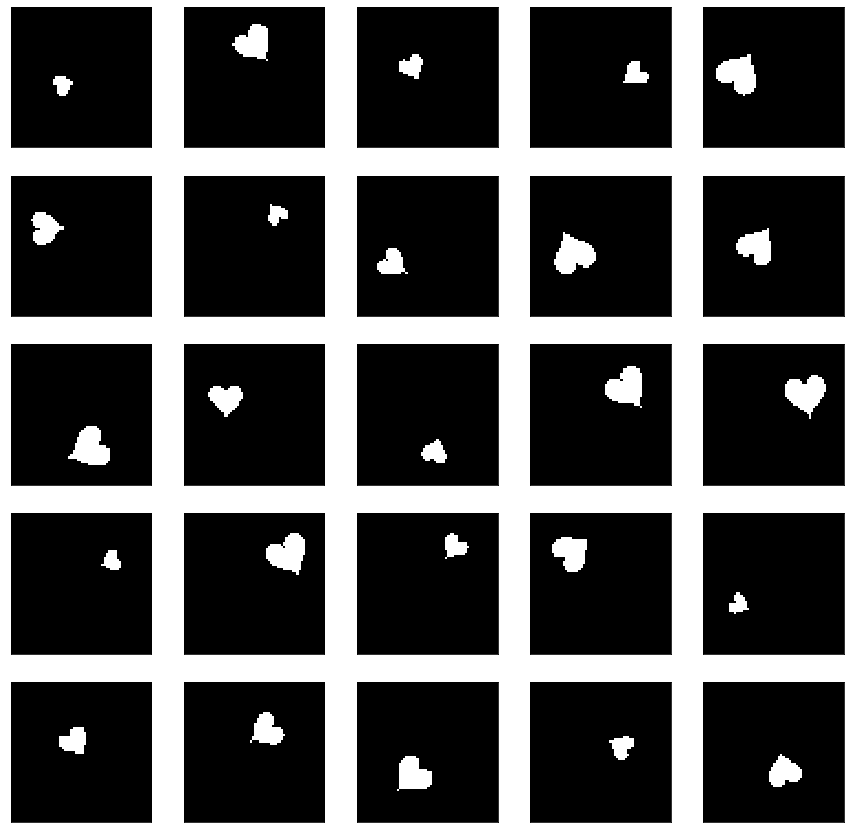

In [40]:
latents_sampled = sample_latent(5000)
latents_sampled[:, 1] = 2
indices = latent_to_index(latents_sampled)
imgs_sampled = imgs[indices]

show_images_grid(imgs_sampled)

In [54]:
# Get the shape latent value of the entire dataset.
# Squares: [0, imgs.shape[0]//3)
# Ellipses: [imgs.shape[0]//3,  2*imgs.shape[0]//3)
# Hearts: [2*imgs.shape[0]//3, imgs.shape[0])
one_third = imgs.shape[0]//3

shape_latent = np.concatenate(
    (np.zeros(one_third),
    np.ones(one_third),
    2*np.ones(one_third),)
).reshape((3*one_third, 1))

shape_latent.shape

245760


(737280, 1)